In [1]:
# Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))

In [3]:
df1=pd.read_excel('cleanch_data.xls')

In [4]:
df1.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=df1.copy()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   tenure           10000 non-null  int64  
 3   balance          10000 non-null  float64
 4   numofproducts    10000 non-null  int64  
 5   hascrcard        10000 non-null  int64  
 6   isactivemember   10000 non-null  int64  
 7   estimatedsalary  10000 non-null  float64
 8   exited           10000 non-null  int64  
 9   gender_n         10000 non-null  int32  
 10  geography_n      10000 non-null  int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


### Data pre processing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_gender=LabelEncoder()
le_geography=LabelEncoder()


In [8]:
df['gender_n']=le_gender.fit_transform(df['gender'])
df['geography_n']=le_geography.fit_transform(df['geography'])

In [9]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_n,geography_n
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2


In [10]:
df=df.drop(['gender','geography'],axis='columns')

In [11]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_n,geography_n
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,2


In [12]:
churn_df = df[['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'gender_n','geography_n','exited']]
churn_df['exited'] = churn_df['exited'].astype('int')
churn_df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,gender_n,geography_n,exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [13]:
X = np.asarray(df[['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'gender_n','geography_n']])
X[0:5]

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05,
        0.0000000e+00, 2.0000000e+00],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, 1.5966080e+05,
        3.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.9900000e+02, 3.9000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.3826630e+04,
        0.0000000e+00, 0.0000000e+00],
       [8.5000000e+02, 4.3000000e+01, 2.0000000e+00, 1.2551082e+05,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 7.9084100e+04,
        0.0000000e+00, 2.0000000e+00]])

In [14]:
y = np.asarray(df['exited'])
y [0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.32622142,  0.2961363 , -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649, -1.09598752, -0.90188624],
       [-0.44003595,  0.20043249, -1.38753759,  0.11735002, -0.91158349,
        -1.54776799,  0.97024255,  0.21653375, -1.09598752,  1.51506738],
       [-1.53679418,  0.2961363 ,  1.03290776,  1.33305335,  2.52705662,
         0.64609167, -1.03067011,  0.2406869 , -1.09598752, -0.90188624],
       [ 0.50152063,  0.00902487, -1.38753759, -1.22584767,  0.80773656,
        -1.54776799, -1.03067011, -0.10891792, -1.09598752, -0.90188624],
       [ 2.06388377,  0.39184012, -1.04175968,  0.7857279 , -0.91158349,
         0.64609167,  0.97024255, -0.36527578, -1.09598752,  1.51506738]])

### Supervised learning techniques

### Preparing the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 10) (8000,)
Test set: (2000, 10) (2000,)


### Logistic Regression

Modeling (Logistic Regression with Scikit-learn)
Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including **‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’** solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [18]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.80502619, 0.19497381],
       [0.80942842, 0.19057158],
       [0.90196785, 0.09803215],
       [0.83482871, 0.16517129],
       [0.88562285, 0.11437715],
       [0.87015713, 0.12984287],
       [0.90998478, 0.09001522],
       [0.75359316, 0.24640684],
       [0.79504616, 0.20495384],
       [0.77351282, 0.22648718]])

### Evaluation

### jaccard index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


The Jaccard Index, also known as the Jaccard similarity coefficient, is a statistic used in understanding the similarities between sample sets. The measurement emphasizes similarity between finite sample sets, and is formally defined as the size of the intersection divided by the size of the union of the sample sets.

In [20]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)      

0.13921113689095127

### Confusion metrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))  

[[  60  336]
 [  35 1569]]


Confusion matrix, without normalization
[[  60  336]
 [  35 1569]]


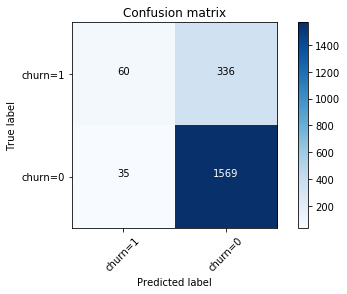

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in test set is 1. As you can calculate, out of 2000 customers, the churn value of 396 of them is 1. And out of these 396, the classifier correctly predicted 60 of them as 1, and 336of them as 0.

It means, for 60 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 336 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 1604 customers whom their churn value were 0.

The classifier correctly predicted 1569 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [25]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1604
           1       0.63      0.15      0.24       396

    accuracy                           0.81      2000
   macro avg       0.73      0.56      0.57      2000
weighted avg       0.79      0.81      0.77      2000



Based on the count of each section, we can calculate precision and recall of each label:

**Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

**Recall** is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

**F1 score**: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.77 in our case.

### Log loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4318329478782644